## 비지도 학습

- 데이터만 존재하는 경우 학습방법
- 타겟(라벨, 정답)이 없는 데이터

- 분류 기분
    * 유사도(데이터의 거리)
    * 분산(데이터 사이의 분포)
- 평가 기준
    * 유사도와 분산을 기본으로 계산 진행
    * 계산 방법 다양 ==. 평가지표 계수 존재

- 종류
    * 군집화 ==> 분할적, 계층적
    * 성분 분석 ==> 주성분 분석
    * 밀도 분류 ==> DBSCAN

- 용도
    * 지도학습의 전처리에 활용
    * 비지도학습으로 분류 후 지도학습으로 최종평가 가능
    

### 군집화 => 분할방식의 K-means

- k개의 임의의 점을 중심으로 데이터와 거리 측정 후 군집 설정
- 설정된 군집의 평균값 계산 ==> 중심점 이동 ==> 다시 군집 설정
- 반복해서 진행
- 타원형으로만 군집이 가능함

### iris 데이터만 가지고 K-means 실습

### [1] 데이터 로딩 및 확인

In [62]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
iris_data=load_iris().data
columns=load_iris().feature_names

In [64]:
irisDF=pd.DataFrame(iris_data, columns=columns)

In [65]:
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### [2] 데이터 분류 진행 ==> kmeans

In [66]:
kModel=KMeans(n_clusters=2)

In [67]:
kModel.fit(irisDF)

KMeans(n_clusters=2)

# [3] 분류 후 결과 속성

In [68]:
kModel.cluster_centers_

array([[5.00566038, 3.36981132, 1.56037736, 0.29056604],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

In [69]:
kModel.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [70]:
kModel.n_iter_

3

In [71]:
kModel.inertia_

152.34795176035797

### [4] iris 데이터셋의 target이랑 kmeans의 labels 값 비교

In [72]:
irisDF['target']=load_iris().target
irisDF['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [73]:
irisDF['cluster']=kModel.labels_
irisDF['cluster']

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: cluster, Length: 150, dtype: int32

In [74]:
irisDF['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [75]:
irisDF['cluster'].value_counts()

1    97
0    53
Name: cluster, dtype: int64

### 최적의 k 찾기

In [76]:
# 타겟 컬럼 제거
irisDF.drop(['cluster'],axis=1,inplace=True)

- [방법1] inertial_ 속성값으로 k판단 ==> 값이 작을수록 좋음, k갯수에 따라 값의 변화가 큰 구간

In [77]:
arr_inertial=[]
for n in range(1,11):
    model = KMeans(n_clusters=n,random_state=10)
    model.fit(irisDF)
    arr_inertial.append(model.inertia_)

Text(0, 0.5, 'inertial_value')

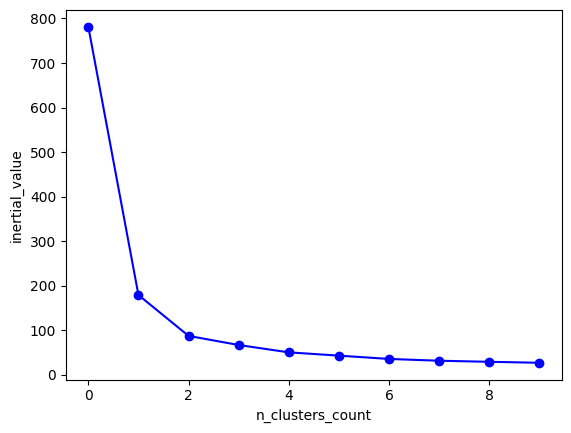

In [78]:
plt.plot(arr_inertial,'bo-')
plt.xlabel('n_clusters_count')
plt.ylabel('inertial_value')

- [방법2] Dunn index => 군집간의 거리, 군집내 거리에 비율로 측정 => davies-bouldin score

In [79]:
from sklearn.metrics import davies_bouldin_score

In [81]:
db_score=[]
for n in range(2,11):
    model=KMeans(n_clusters=n,random_state=10)
    model.fit(irisDF)

    sc=davies_bouldin_score(irisDF,model.labels_)
    db_score.append(sc)

Text(0, 0.5, 'davies_bouldin_score')

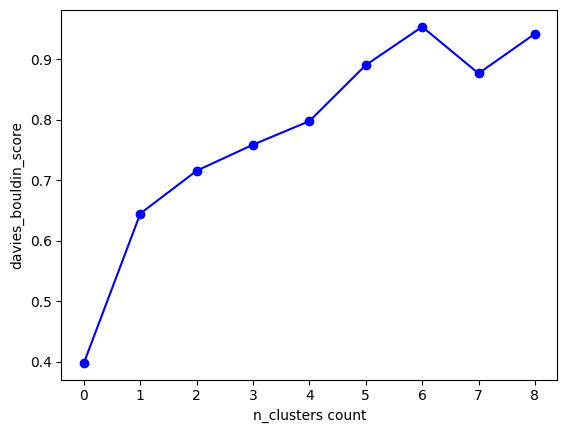

In [82]:
plt.plot(db_score,'bo-')
plt.xlabel('n_clusters count')
plt.ylabel('davies_bouldin_score')